# <center> Study of applications in Google Play Store </center>

***
### Sieh Yao Zhang, Ning Sheng Ying and Ashiq Muhammad <br> DS102 | Course Assignment

####  
#### Introduction

Nowadays, with the ease of access to free information and tools available on the Internet, making mobile applications has never been easier than before. This is accentuated by the ubiquitous number of applications in the Google Play Store and Apple App Store. However, our group realise that it has become a problem. Even though many apps are available, most of them do not meet consumer expectations and are there only to clutter out the useful ones from consumers. As such, it would be more troublesome for a customer to find an app that suits his/her needs.

Therefore, this report aims to accomplish the following objectives:
* Identifying important features of an application through the use of WordCloud on reviews of applications
* Analyzing price distributions among apps belonging to the same category which affects pricing decisions
* Drawing correlations between different aspects of an app
  1. Price against number of downloads
  1. Price against ratings

In doing so, we hope our analysis will give app developers a clearer idea of what to look out for when developing an app so that we can declutter the app markets while reducing wastage of resources.

#### Dataset

The data was taken from [Kaggle](https://www.kaggle.com/lava18/google-play-store-apps).
The title of the datasets are google play store and google play store user reviews.

## Methodology

In [1]:
# Import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

print("Downloading corpora...")    
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
print("Corpora download complete.")

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer # machine learning lib
from sklearn.naive_bayes import MultinomialNB # machine learning lib

from wordcloud import (WordCloud, get_single_color_func)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sieh_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sieh_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sieh_\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sieh_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sieh_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Corpora download complete.


C:\Users\sieh_\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### Data cleaning 

The first thing we do is to clean all entries with dirty data. Our data cleaning process will be as follows:
- Removing duplicates and data entries with abnormal values
- Stripping unwanted symbols from strings and values
- Converting all data entries into their appropriate data types

We will only be using relevant data from Category, Rating, Reviews, Installs and Price.

We will also combine the dataset of google play store user reviews with google play store. All reviews for each application will be combined into one entire string. Applications that have no reviews for this combined data set will be ignored. Then, text mining will be performed on the string of words.
Throughout this entire project, we will be performing data visualisation on these 2 datasets, google play store (apps_df) as well as the combined data set (apps_df_merge).

In [2]:
# Reading imported .csv files into datasets

apps_df = pd.read_csv("googleplaystore.csv")
reviews_df = pd.read_csv("googleplaystore_user_reviews.csv")

#### Cleaning of app data

In [3]:
apps_df['Category'] = apps_df['Category'].str.lower()
apps_df['Category'] = apps_df['Category'].apply(lambda x: re.sub('_', ' ',x))
apps_df = apps_df[apps_df['Category'] != '1.9']

apps_df['Rating'][np.isnan(apps_df['Rating'])] = 0
apps_df = apps_df[apps_df['Rating'] != 0]

apps_df['Reviews'] = apps_df['Reviews'].apply(np.int)
    
apps_df['Installs_cl'] = apps_df['Installs'].str.rstrip('+')
apps_df['Installs_cl'] = apps_df['Installs_cl'].apply(lambda x: re.sub(',', '', x))

apps_df['Price_cl'] = apps_df['Price'].str.lstrip('$')
apps_df["Price_cl"] = apps_df["Price_cl"].apply(np.float)

apps_df_cl = apps_df[['App', 'Category', 'Rating', 'Reviews', 'Installs_cl', 'Price_cl']]

cols = ['Rating', 'Reviews', 'Installs_cl', 'Price_cl']
for x in cols:
    apps_df_cl[x] = apps_df_cl[x].apply(np.float)

#remove Duplicates in data
apps_df_cl = apps_df_cl.drop_duplicates()

apps_df_cl

C:\Users\sieh_\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,App,Category,Rating,Reviews,Installs_cl,Price_cl
0,Photo Editor & Candy Camera & Grid & ScrapBook,art and design,4.1,159.0,10000.0,0.0
1,Coloring book moana,art and design,3.9,967.0,500000.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art and design,4.7,87510.0,5000000.0,0.0
3,Sketch - Draw & Paint,art and design,4.5,215644.0,50000000.0,0.0
4,Pixel Draw - Number Art Coloring Book,art and design,4.3,967.0,100000.0,0.0
5,Paper flowers instructions,art and design,4.4,167.0,50000.0,0.0
6,Smoke Effect Photo Maker - Smoke Editor,art and design,3.8,178.0,50000.0,0.0
7,Infinite Painter,art and design,4.1,36815.0,1000000.0,0.0
8,Garden Coloring Book,art and design,4.4,13791.0,1000000.0,0.0
9,Kids Paint Free - Drawing Fun,art and design,4.7,121.0,10000.0,0.0


#### Cleaning of reviews data

In [4]:
reviews_df2 = reviews_df.dropna()

reviews_df2 = reviews_df2.iloc[:, 0:2]
reviews_df2 = reviews_df2.groupby('App')

review_agg = reviews_df2.agg({'Translated_Review': lambda x: ' '.join(x)}).reset_index()
review_agg['Translated_Review_use'] = review_agg['Translated_Review'].apply(lambda x: x.lower())
review_agg.head()

,App,Translated_Review,Translated_Review_use
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,i like eat delicious food. that's i'm cooking ...
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,"Great nice Almost mobile phone Very effective,...","great nice almost mobile phone very effective,..."
2,11st,Horrible ID verification Easy even basic Korea...,horrible id verification easy even basic korea...
3,1800 Contacts - Lens Store,Great hassle free way order contacts. Got call...,great hassle free way order contacts. got call...
4,1LINE – One Line with One Touch,"gets 1* there's ad every single level restart,...","gets 1* there's ad every single level restart,..."


##### Removing of punctuation

In [5]:
pattern = "[.®'&$’\"\-()!><?:%,]"
def clear(x):
    return re.sub(pattern, '', x)
review_agg['Translated_Review_cl'] = review_agg['Translated_Review_use'].apply(clear)

##### Tokenize

In [6]:
review_agg['Translated_Review_token'] = review_agg['Translated_Review_cl'].apply(lambda x: word_tokenize(x))

##### Stemming

In [7]:
stemmer = PorterStemmer()
cells = len(review_agg['Translated_Review_token'])
review_agg['Translated_Review_stem'] =  " "
# review_agg['Translated_Review_token'][0]

stemmed = []
for i in range(cells):
    for token in review_agg['Translated_Review_token'][i]:
        stem_word = stemmer.stem(token)
        stemmed.append(stem_word)
        review_agg['Translated_Review_stem'][i] = stemmed.copy()
    del stemmed[:]

##### Remove Stopwords

In [8]:
stop_words= stopwords.words('english')
cells = len(review_agg['Translated_Review_stem'])
review_agg['Translated_Review_stem_cl'] =  " "

stem_cl = []
for m in range(cells):
    for word in review_agg['Translated_Review_stem'][m]:
        if word not in stop_words:
            stem_cl.append(word)
            review_agg['Translated_Review_stem_cl'][m] = stem_cl.copy()  
    del stem_cl[:]

#### Procressive Data Cleaning of Reviews

In [9]:
review_agg = review_agg.drop_duplicates('App')

##### Sentiment Analysis (Added Here)

In [10]:
sid =  SentimentIntensityAnalyzer()

In [11]:
review_agg['Sentiment'] = review_agg['Translated_Review_cl'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [12]:
apps_df_merge = apps_df_cl.merge(review_agg, on='App', how='right')

In [13]:
apps_df_merge.sort_values("App")
apps_df_merge = apps_df_merge.dropna()
apps_df_merge = apps_df_merge.drop_duplicates('App')
apps_df_merge = apps_df_merge[['App', 'Category', 'Rating', 'Reviews', 'Installs_cl', 'Price_cl', 'Translated_Review_stem_cl', 'Sentiment' ]]
apps_df_merge.head()

,App,Category,Rating,Reviews,Installs_cl,Price_cl,Translated_Review_stem_cl,Sentiment
0,Coloring book moana,art and design,3.9,967.0,500000.0,0.0,"[kid, excess, ad, type, ad, allow, app, let, a...",0.9975
2,Garden Coloring Book,art and design,4.4,13791.0,1000000.0,0.0,"[itsa, color, book, ap, like, adult, color, bo...",0.9999
3,FlipaClip - Cartoon animation,art and design,4.3,194216.0,5000000.0,0.0,"[im, glad, help, stressfre, anim, ever, want, ...",0.9909
4,Boys Photo Editor - Six Pack & Men's Suit,art and design,4.1,654.0,100000.0,0.0,"[vi, vi, worst, note, work, proper, photo, edi...",0.9963
5,Colorfit - Drawing & Coloring,art and design,4.7,20260.0,500000.0,0.0,"[good, luck, get, pictur, free, everyday, supp...",0.9998


### Data Visualisation

From the cleaned dataframe above, we will be observing the relationship between price and installs.

C:\Users\sieh_\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0.0
  'left=%s, right=%s') % (left, right))
C:\Users\sieh_\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0.0
  'left=%s, right=%s') % (left, right))
C:\Users\sieh_\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0.0
  'left=%s, right=%s') % (left, right))
C:\Users\sieh_\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0.0
  'left=%s, right=%s') % (left, right))
C:\Users\sie

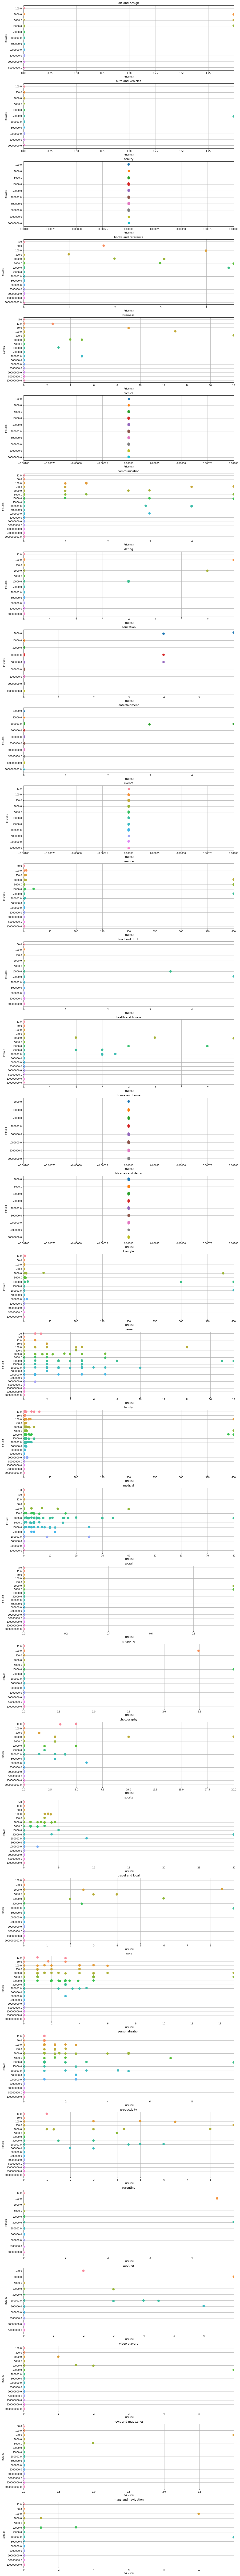

In [14]:
lst = list(apps_df['Category'].unique())
fig = plt.figure(figsize = (16, 200))

for i in range(0, len(lst)):
    plt.subplot(len(lst), 1, i + 1)
    col = lst[i]
    expensive = apps_df_cl[apps_df_cl['Category'] == col]['Price_cl'].max()
    plt.xlim([0, expensive])
    sns.stripplot(data = apps_df_cl[apps_df_cl['Category'] == col], y = 'Installs_cl', x = 'Price_cl', jitter = True, orient = 'h', size = 10)
    plt.grid(True)
    plt.xlabel('Price ($)')
    plt.ylabel('Installs')
    plt.title(col)
    
    
plt.show()

From the above graph, we can see that for most categories, the price ranges from free to 20 dollars. However there are some exceptions such as, finance, lifestyle and family, where there are some applications that costs ~400 dollars and the rest of the apps are free. <br>
There is also 'medical' that have a price range of free to 80 dollars.  However, the bulk of the applications range from free to 40 dollars. The applications that are not free also have a decent amount of downloads from 100s to 100,000s.

Overall, the key observation here is that the number of downloads of any priced application does not exceed 50 million downloads. The only category with priced applications that managed to hit 10 million downloads is 'game'. Therefore, we can expect that even if a priced app is popular, it will never have the exposure to the userbase that free apps can have. So it might be better for apps belonging to certain categories to be free while offering in-app-purchases to generate revenue.

Now, we will be looking at the relationship between prices and the ratings.

C:\Users\sieh_\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\sieh_\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\sieh_\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\sieh_\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\sieh_\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\sieh_\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\sieh_\Anaconda3\lib\site-packages\ipykernel_launc

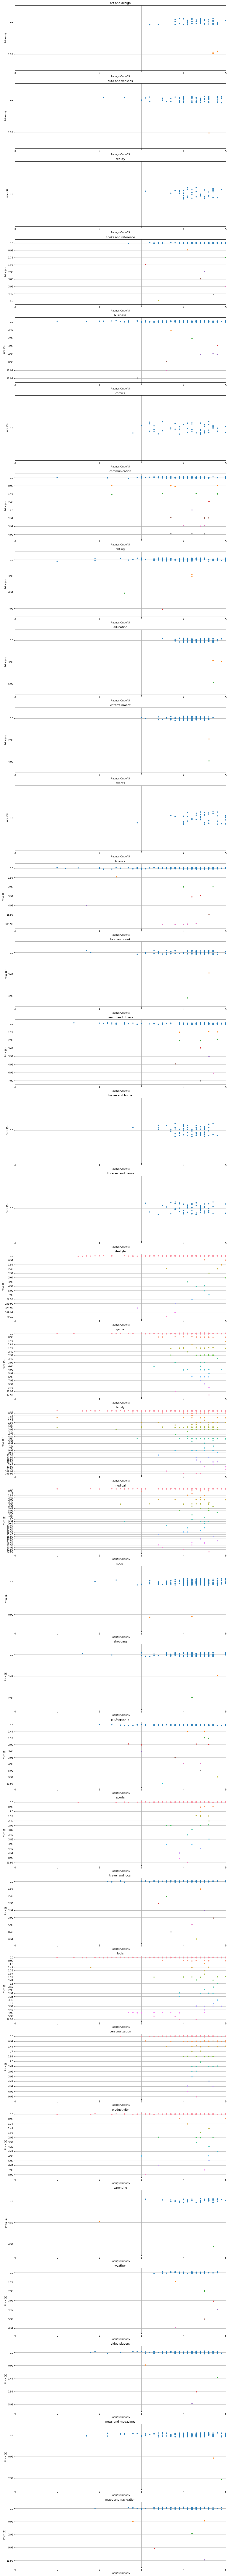

In [15]:
fig = plt.figure(figsize = (16, 200))

for i in range(0, len(lst)):
    plt.subplot(len(lst), 1, i + 1)
    col = lst[i]
    plt.xlim([0, 5])
    sns.stripplot(data = apps_df_cl[apps_df['Category'] == col], x='Rating', y = 'Price_cl', jitter = True, orient = 'h', size = 10, marker='.')
    plt.grid(True)
    plt.xlabel('Ratings Out of 5')
    plt.ylabel('Price ($)')
    plt.title(col)
    
plt.show()

As seen from the above graph, generally most paid applications received a good rating as compared to the free applications in each category. A certain standard has to be met for the application to be paid so that there will be people that are willing to pay for the application. <br>
However, in several categories, finance, family and parenting, there is a couple of applications that are paid but is very poorly rated among the applications in its own category. This may be due to the higher expectations from the public on the paid apps and the application might actually be of the same standard as other free applications.  <br>
When compared to free applications, we observed that the paid applications have a smaller spread in their ratings. This is probably because when assigning a price tag to their applications, developers believe that they should be rewarded for the efforts they have invested. Therefore, going by this logic, priced applications are generally better in comparison. Therefore, should app developers want to release paid apps into the market, they have to be sure that their app is able to stand out from the free apps.

Now, we will be taking a look at the percentage composition of free and paid apps in each of the categories in the Google Play Store.

In [17]:
# Creating a DataFrame that shows the number of free and paid apps in each category
cat_dict = {}

categories = apps_df_cl['Category'].unique().tolist()

for cat in categories:
    cond1 = apps_df_cl['Category'] == cat
    free = apps_df_cl['Price_cl'] == 0
    paid = apps_df_cl['Price_cl'] != 0
    
    no_of_free = len(apps_df_cl[cond1 & free])
    no_of_paid = len(apps_df_cl[cond1 & paid])
    
    cat_dict[cat] = {"Free": no_of_free, "Paid": no_of_paid}

free_vs_paid_df = pd.DataFrame(cat_dict).T
free_vs_paid_df.head()

,Free,Paid
art and design,59,3
auto and vehicles,72,1
beauty,42,0
books and reference,169,8
business,261,9


In [18]:
# Adding additional information to the dataset

free_vs_paid_df['Total'] = free_vs_paid_df['Free'] + free_vs_paid_df['Paid']
free_vs_paid_df['Free (%)'] = round(free_vs_paid_df['Free'] / free_vs_paid_df['Total'] * 100, 1)
free_vs_paid_df['Paid (%)'] = round(free_vs_paid_df['Paid'] / free_vs_paid_df['Total'] * 100, 1)

free_vs_paid_df

,Free,Paid,Total,Free (%),Paid (%)
art and design,59,3,62,95.2,4.8
auto and vehicles,72,1,73,98.6,1.4
beauty,42,0,42,100.0,0.0
books and reference,169,8,177,95.5,4.5
business,261,9,270,96.7,3.3
comics,58,0,58,100.0,0.0
communication,285,22,307,92.8,7.2
dating,155,4,159,97.5,2.5
education,125,4,129,96.9,3.1
entertainment,109,2,111,98.2,1.8


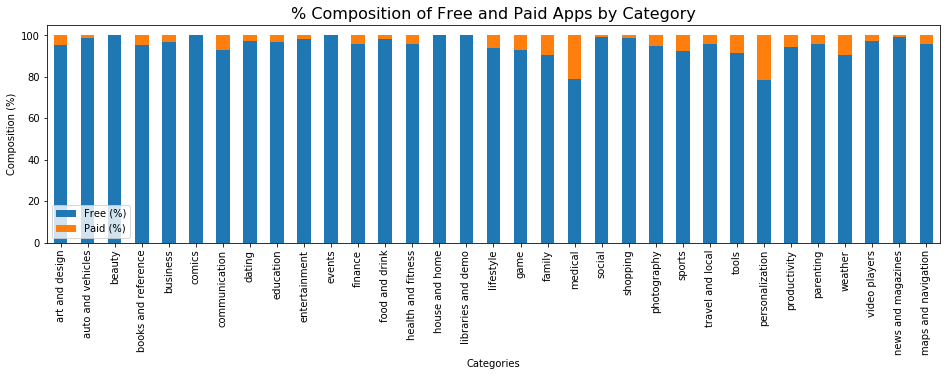

In [19]:
# Plotting the Bar Chart for each category

fig = plt.figure(figsize = (16, 4))
ax = fig.add_subplot(111)

rng = np.arange(33)
width = 0.5

free_vs_paid_df.plot.bar(y = ["Free (%)", "Paid (%)"], width = width, ax = ax, stacked = True)

ax.set_title('% Composition of Free and Paid Apps by Category', fontsize = 16)
ax.set_xlabel("Categories")
ax.set_ylabel("Composition (%)")

plt.show()

From the plotted stacked bar chart above, we can see that free apps are mostly abundant across all categories. Some insights that can be gained from this is that, if developers were to release priced apps into the Google Play Store, it would be difficult to compete with the vast majority of free apps that are already available in the Play Store. Also, seeing how the numbers are heavily biased towards free apps, the demand for apps are likely to be price elastic across all categories, and thus it would not be advisable for developers to assign a heavy price tag to their apps.<br>
For categories such as 'beauty', 'comics' and 'events', it would be unwise for a developer to introduce a priced app because all apps available for such categories are offered for free. <br>
However, for categories such as 'medical' and 'personalization', we observe that paid apps take up a much larger composition as compared to other categories. This could mean that demand for such apps are high. Therefore, more app developers are attracted here to compete. Thus, if a developer is confident that his/her app is able to stand out from the rest, then introducing a priced app in these categories should be able to bring about a considerable revenue.

Now, we shall take a look at the app market as a whole.

In [20]:
# We will look in detail at the Top 7 Categories with the most apps
n = 7
rest = len(categories) - n
major = free_vs_paid_df.nlargest(n, 'Total')
minor = free_vs_paid_df.nsmallest(rest, 'Total')

temp = {'Free': minor['Free'].sum(), 'Paid': minor['Paid'].sum(), 'Total': minor['Total'].sum()}
others = pd.DataFrame(temp, index = [0])
others['Free (%)'] = round(others['Free'] / others['Total'] * 100, 1)
others['Paid (%)'] = round(others['Paid'] / others['Total'] * 100, 1)
others.rename({0: "others"}, axis = "index", inplace = True)
major = major.append(others)

major

,Free,Paid,Total,Free (%),Paid (%)
family,1560,158,1718,90.8,9.2
game,997,77,1074,92.8,7.2
tools,670,63,733,91.4,8.6
productivity,316,18,334,94.6,5.4
finance,304,13,317,95.9,4.1
personalization,244,66,310,78.7,21.3
communication,285,22,307,92.8,7.2
others,3901,196,4097,95.2,4.8


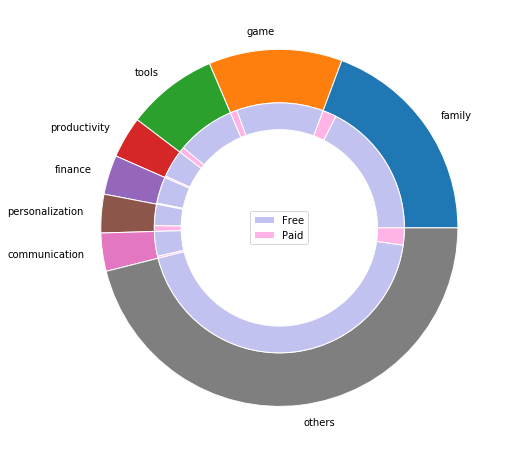

In [21]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.axis('equal')
width = 0.3

pie, _ = ax.pie(major['Total'], radius=1, labels=major.index)
plt.setp( pie, width=width, edgecolor='white')

inner_values = [(i, j) for i,j in zip(major['Free'], major['Paid'])]
inner_values = list(sum(inner_values, ()))
h = ['Free', 'Paid']
subgroup_names= 8 * h
subcolors = ['#c2c2f0','#ffb3e6'] * 8

pie2, _ = ax.pie(inner_values, radius=1-width,labeldistance=0.7, colors = subcolors)
plt.setp( pie2, width=0.15, edgecolor='white')
plt.legend([pie2[0], pie2[1]], h, loc = 10)

plt.show()

In the nested pie chart above, we observe that even among the top 7 categories for number of apps, the number of paid apps pales in comparison to that of the free apps. This highlights a increasingly prominent trend among consumers. Consumers nowadays are less willing to pay for apps and this is due to the low barriers to entry of making mobile applications. And because anyone is able to make a mobile application with free information and tools available online, almost any category will have a few hundred competitors all taking the price to the bottom. Thus, consumers develop the mindset that apps should be available for free. <br>
Therefore, as app developers, there should be a shift in pricing strategy as well. Apps should mostly be made available for free to consumers and revenue should be generated through In-App-Purchases (i.e IAP) seeing how yearly IAP revenue for both Google Play Store and App Store are increasing drastically with each passing year. Offering an app for free also gives consumers the added confidence that they can try the app with no risks of lost costs. 

In [22]:
# reset index to a range
apps_df_merge.index = np.arange(0, len(apps_df_merge))

### Word Analysis and Visualisation

In [25]:
cond1 = apps_df_merge['Sentiment'] < 0
cond2 = apps_df_merge['Sentiment'] >= 0
overall_negative_review =apps_df_merge[cond1]
overall_positive_review =apps_df_merge[cond2]

From the individual Dataframe lets identify the most common Stemmed Words used.

In [26]:
# Filter df
overall_positive_review_filter = overall_positive_review[['Category','Translated_Review_stem_cl']]

# Group by category
overall_positive_review_group = overall_positive_review_filter.groupby('Category')
overall_positive_review_use = overall_positive_review_group.sum().reset_index()

In [27]:
# Filter df
overall_negative_review_filter = overall_negative_review[['Category','Translated_Review_stem_cl']]

# Group by category
overall_negative_review_group = overall_negative_review_filter.groupby('Category')
overall_negative_review_use = overall_negative_review_group.sum().reset_index()

#### Create dict for 10 most common words for each category

##### Positive

In [28]:
overall_positive_review_use['freq'] = ''

A = {}
for i in range(len(overall_positive_review_use)):
    word_dist = nltk.FreqDist(overall_positive_review_use.Translated_Review_stem_cl[i]).most_common(15)
    A.update(word_dist)
    overall_positive_review_use['freq'][i] = A.copy()
    A.clear()

overall_positive_review_use.head()

,Category,Translated_Review_stem_cl,freq
0,art and design,"[kid, excess, ad, type, ad, allow, app, let, a...","{'color': 99, 'love': 84, 'good': 64, 'like': ..."
1,auto and vehicles,"[good, review, materi, cdl, got, permit, 3, da...","{'great': 71, 'app': 63, 'use': 61, 'car': 49,..."
2,beauty,"[hair, feel, like, good, thing, cuz, harder, s...","{'good': 41, 'love': 40, 'like': 27, 'app': 25..."
3,books and reference,"[ok, despit, experi, could, littl, intuit, men...","{'book': 180, 'read': 156, 'use': 103, 'app': ..."
4,business,"[file, im, tri, open, give, messag, intern, er...","{'work': 146, 'good': 136, 'use': 129, 'app': ..."


##### Negative

In [29]:
overall_negative_review_use['freq'] = ''

A = {}
for i in range(len(overall_negative_review_use)):
    word_dist = nltk.FreqDist(overall_negative_review_use.Translated_Review_stem_cl[i]).most_common(10)
    A.update(word_dist)
    overall_negative_review_use['freq'][i] = A.copy()
    A.clear()

overall_negative_review_use.head()

,Category,Translated_Review_stem_cl,freq
0,auto and vehicles,"[bad, bad, excit, car, like, mustang, lamborgh...","{'bad': 2, 'excit': 1, 'car': 1, 'like': 1, 'm..."
1,beauty,"[thi, a̸p̸p̸, na, kare, pleas, mere, bhai, l, ...","{'bad': 26, 'good': 12, 'fake': 11, 'veri': 8,..."
2,business,"[massiv, updat, least, week, realli, necessari...","{'work': 56, 'messag': 30, 'time': 26, 'notif'..."
3,communication,"[decent, enough, app, visual, voicemail, prior...","{'voicemail': 23, 'work': 15, 'app': 10, 'get'..."
4,dating,"[tri, hide, time, hid, never, allow, open, tri...","{'work': 25, 'open': 23, 'whatsapp': 17, 'plea..."


#### Combine all freq into one dict

In [30]:
New_dict = overall_positive_review_use['freq'][0].copy()
for i in range(len(overall_positive_review_use)-1):
    New_dict.update(overall_positive_review_use['freq'][i+1])

##### New coloumn of key words

In [31]:
def key_word(x):
    words = []
    for k in x:
        words.append(k)
    return(words)
     
overall_positive_review_use['words'] = overall_positive_review_use['freq'].apply(key_word)
overall_positive_review_use.head()

,Category,Translated_Review_stem_cl,freq,words
0,art and design,"[kid, excess, ad, type, ad, allow, app, let, a...","{'color': 99, 'love': 84, 'good': 64, 'like': ...","[color, love, good, like, pictur, app, make, t..."
1,auto and vehicles,"[good, review, materi, cdl, got, permit, 3, da...","{'great': 71, 'app': 63, 'use': 61, 'car': 49,...","[great, app, use, car, get, work, help, good, ..."
2,beauty,"[hair, feel, like, good, thing, cuz, harder, s...","{'good': 41, 'love': 40, 'like': 27, 'app': 25...","[good, love, like, app, thi, ad, use, amaz, re..."
3,books and reference,"[ok, despit, experi, could, littl, intuit, men...","{'book': 180, 'read': 156, 'use': 103, 'app': ...","[book, read, use, app, love, updat, great, kin..."
4,business,"[file, im, tri, open, give, messag, intern, er...","{'work': 146, 'good': 136, 'use': 129, 'app': ...","[work, good, use, app, great, time, busi, thi,..."


#### Generate wordcloud 

In [32]:
desc_wordcloud = WordCloud(colormap= 'jet',
    background_color="white",
    max_words=200).generate_from_frequencies(New_dict)

#### Created Class from online

In [33]:
"""
Colored by Group Example
========================
Generating a word cloud that assigns colors to words based on
a predefined mapping from colors to words
"""

class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping
       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.
       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.
       Uses wordcloud.get_single_color_func
       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.
       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)



#  IMPORTED FROM : https://github.com/amueller/word_cloud/blob/master/examples/colored_by_group.py

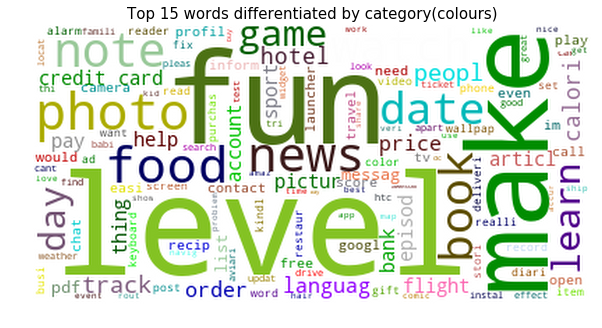

In [34]:
color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': overall_positive_review_use['words'][0],
    # will be colored with a red single color function
    'red': overall_positive_review_use['words'][1],
    'blue':overall_positive_review_use['words'][2],
    'gold':overall_positive_review_use['words'][3],
    'yellow':overall_positive_review_use['words'][4],
    'orange': overall_positive_review_use['words'][5],
    'coral':overall_positive_review_use['words'][6],
    'aqua':overall_positive_review_use['words'][7],
    'indigo': overall_positive_review_use['words'][8],
    'dimgray': overall_positive_review_use['words'][9],
    'firebrick':overall_positive_review_use['words'][10],
    'greenyellow':overall_positive_review_use['words'][11],
    'darkgreen':overall_positive_review_use['words'][12],
    'darkblue':overall_positive_review_use['words'][13],
    'blueviolet':overall_positive_review_use['words'][14],
    'plum':overall_positive_review_use['words'][15],
    'darkmagenta':overall_positive_review_use['words'][16],
    'cyan':overall_positive_review_use['words'][17],
    'darkorange':overall_positive_review_use['words'][18],
    'turquoise':overall_positive_review_use['words'][19],
    'rosybrown':overall_positive_review_use['words'][20],
    'indianred':overall_positive_review_use['words'][21],
    'salmon':overall_positive_review_use['words'][22],
    'sienna':overall_positive_review_use['words'][23],
    'olive':overall_positive_review_use['words'][24],
    'darkseagreen':overall_positive_review_use['words'][25],
    'lawngreen':overall_positive_review_use['words'][26],
    'teal':overall_positive_review_use['words'][27],
    'lavender':overall_positive_review_use['words'][28],
    'lime':overall_positive_review_use['words'][29],
    'hotpink':overall_positive_review_use['words'][30],
    'slategrey':overall_positive_review_use['words'][31],
    'peru':overall_positive_review_use['words'][32],
#     'darkslategray':overall_positive_review_use['words'][33],
    
    
}

# Words that are not in any of the color_to_words values
# will be colored with a grey single color function
default_color = 'grey'

# Create a color function with single tone
# grouped_color_func = SimpleGroupedColorFunc(color_to_words, default_color)

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function

desc_wordcloud.recolor(color_func=grouped_color_func)


# wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure(figsize=(10,10))
plt.imshow(desc_wordcloud, interpolation="lanczos")
plt.title('Top 15 words differentiated by category(colours)', fontsize = 15)
plt.axis("off")
plt.show()

The above graph is a wordcloud of all the applications across all categories for all applications that have positive sentiments. The different colours represent the various categories present in the dataframe. <br>
These words are what the public are looking out for within the application for each specific category. Hence, when developing an application, the developers should be looking out to ensuring their application has elements of these words if they want a good review to be left on their application.

We will now look into what are the things the public look out for an app to be popular in each of their category. We will need to first filter out the top 25% applications in terms of downloads in their respective categories. From there, we will look at the words that are commonly used to describe these applications. These words will be the things that people look out for in an application that will make it successful in their own respective fields.

##### Finding top 25% applications

In [35]:
popular_df = apps_df_merge.copy()
    
for i in lst:
    cat_df = apps_df_merge[apps_df_merge['Category'] == i]
    p75 = np.percentile(cat_df['Installs_cl'], 75)
    for j in range(len(popular_df)):
        if popular_df['Installs_cl'][j] < p75 and popular_df['Category'][j] == i:
            popular_df['Installs_cl'][j] = 'nan'
popular_df = popular_df.dropna()

popular_df.head()

C:\Users\sieh_\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,App,Category,Rating,Reviews,Installs_cl,Price_cl,Translated_Review_stem_cl,Sentiment
2,FlipaClip - Cartoon animation,art and design,4.3,194216.0,5000000.0,0.0,"[im, glad, help, stressfre, anim, ever, want, ...",0.9909
8,Floor Plan Creator,art and design,4.1,36639.0,5000000.0,0.0,"[like, featur, addict, suggest, sure, alreadi,...",0.9999
9,"Canva: Poster, banner, card maker & graphic de...",art and design,4.7,174531.0,10000000.0,0.0,"[love, canva, thank, mobil, desktop, version, ...",0.9999
13,"Android Auto - Maps, Media, Messaging & Voice",auto and vehicles,4.2,271920.0,10000000.0,0.0,"[everi, drive, car, secur, phone, dash, run, a...",0.9998
16,AutoScout24 Switzerland – Find your new car,auto and vehicles,4.6,13372.0,1000000.0,0.0,"[suddenli, start, close, self, autoscout24, ke...",0.9988


##### Group reviews by category 

In [36]:
popular_df_category = popular_df[['Category','Translated_Review_stem_cl']]

# Group by category
popular_df_category_group = popular_df_category.groupby('Category')
popular_df_category_use = popular_df_category_group.sum().reset_index()

##### Finding frequency of words

In [37]:
popular_df_category_use['freq'] = ''
A = {}
for i in range(len(popular_df_category_use)):
    word_dist = nltk.FreqDist(popular_df_category_use.Translated_Review_stem_cl[i]).most_common(10)
#     word_dist = dict(itertools.zip_longest(*[iter(word_dict)] * 2))
    A.update(word_dist)
    popular_df_category_use['freq'][i] = A.copy()
    A.clear()

popular_df_category_use.head()

,Category,Translated_Review_stem_cl,freq
0,art and design,"[im, glad, help, stressfre, anim, ever, want, ...","{'use': 25, 'app': 23, 'like': 18, 'make': 16,..."
1,auto and vehicles,"[everi, drive, car, secur, phone, dash, run, a...","{'use': 45, 'great': 45, 'app': 39, 'car': 34,..."
2,beauty,"[thi, trash, five, star, bot, disgust, think, ...","{'ad': 22, 'app': 19, 'love': 17, 'good': 16, ..."
3,books and reference,"[ok, despit, experi, could, littl, intuit, men...","{'book': 139, 'read': 130, 'kindl': 74, 'app':..."
4,business,"[file, im, tri, open, give, messag, intern, er...","{'work': 66, 'good': 61, 'file': 53, 'use': 53..."


<Figure size 1152x8640 with 0 Axes>

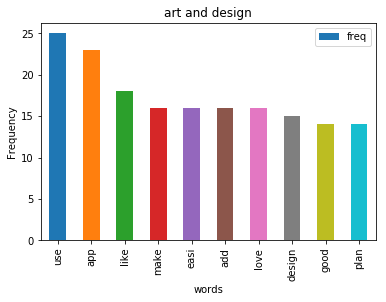

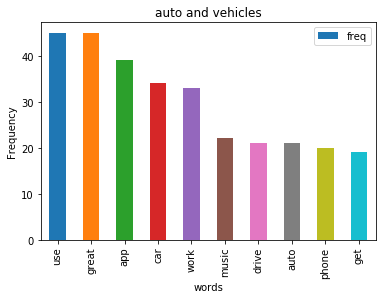

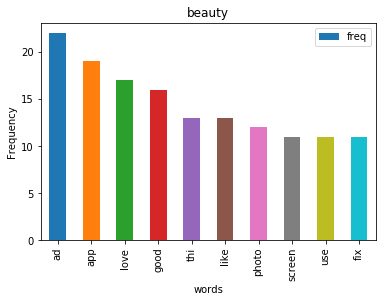

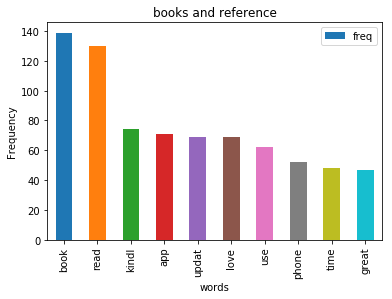

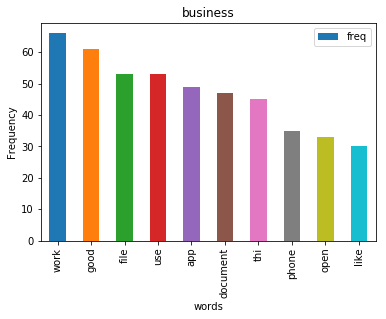

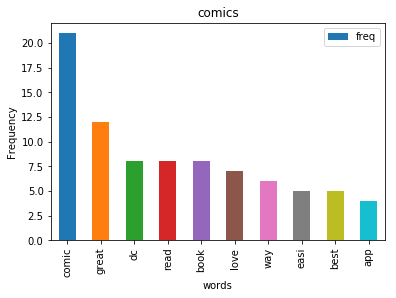

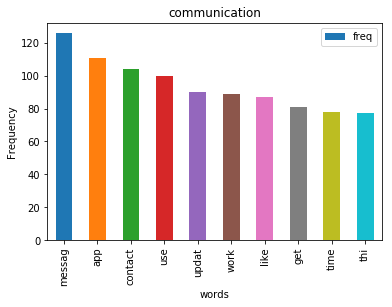

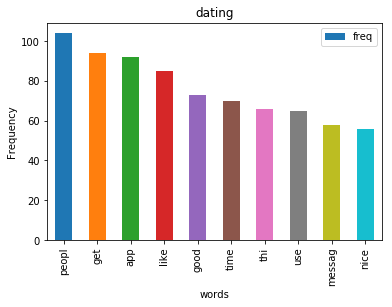

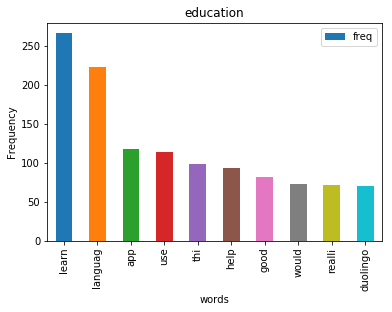

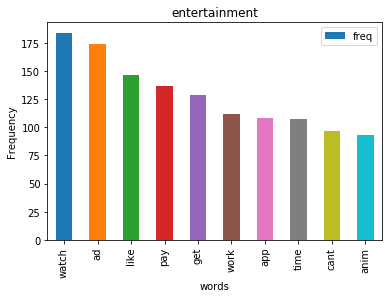

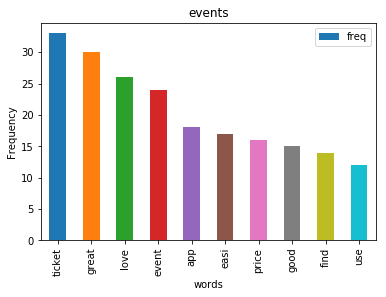

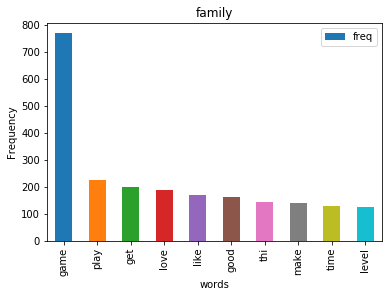

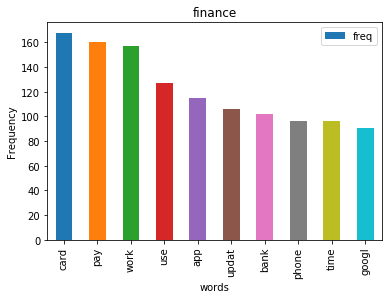

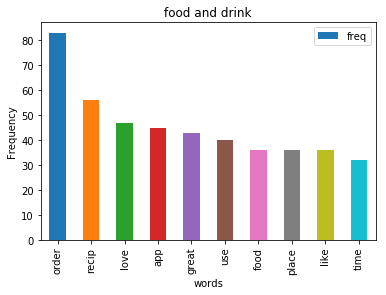

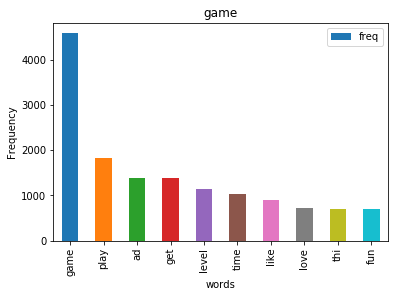

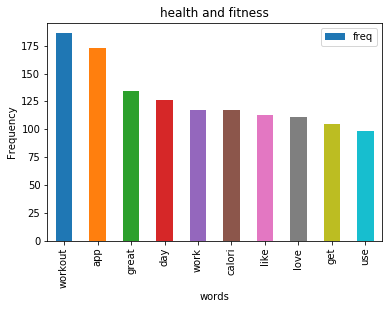

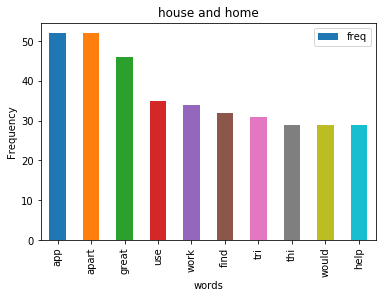

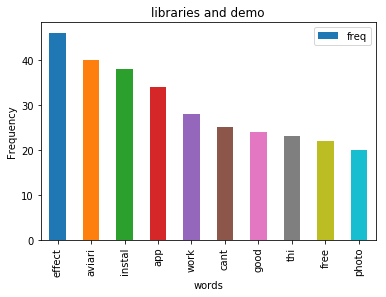

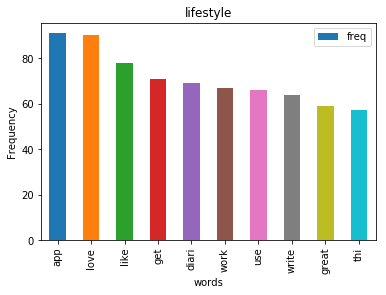

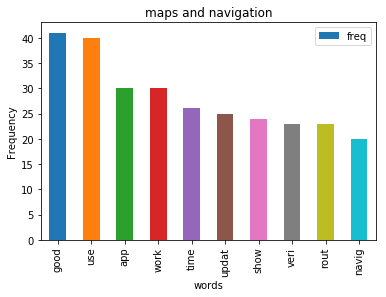

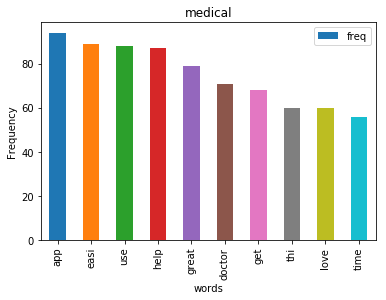

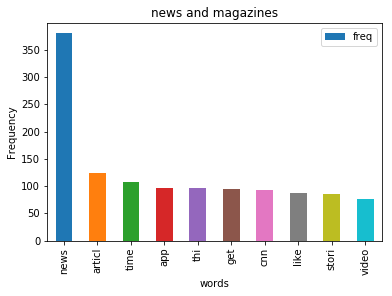

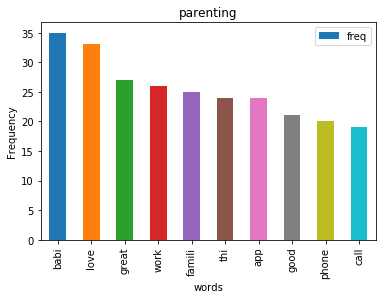

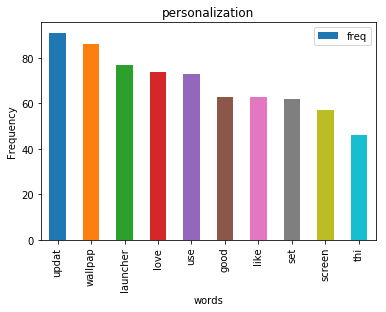

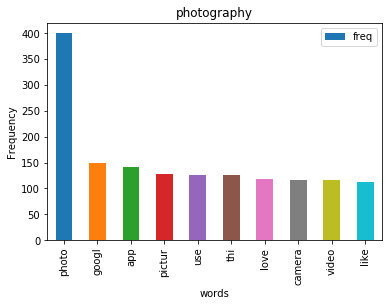

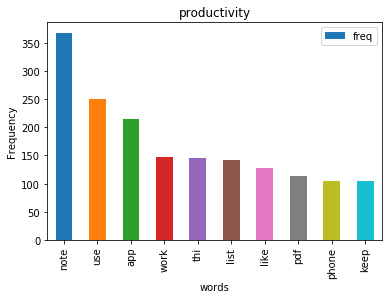

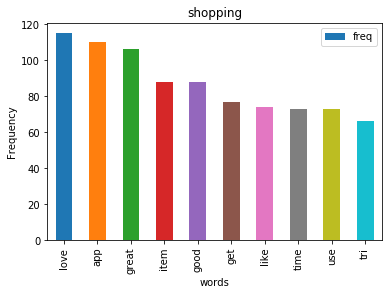

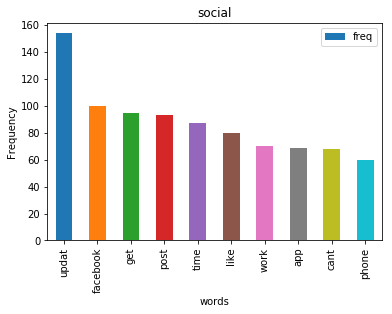

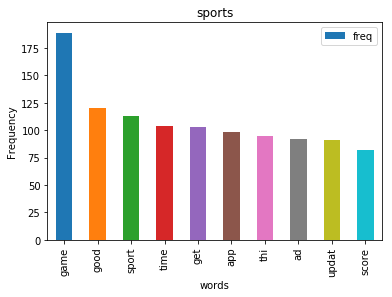

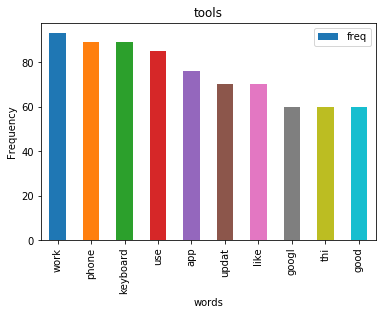

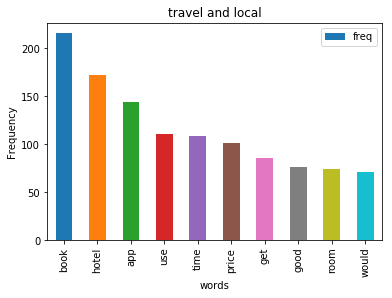

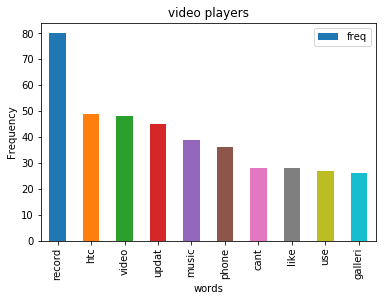

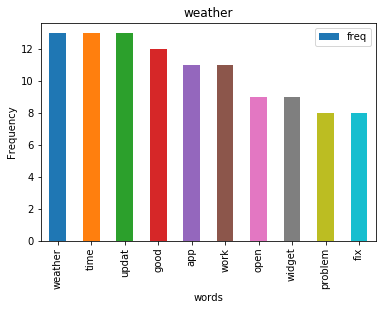

In [39]:
fig = plt.figure(figsize = (16, 120))
cat_names = list(popular_df_category_use['Category'])

for i in range(len(cat_names)):
    temp = popular_df_category_use['freq'][i]
    words = []
    freq = []
    for k,v in temp.items():
        words.append(k)
        freq.append(v)
    temp_dict = {'words': words, 'freq': freq}
    temp_df = pd.DataFrame.from_dict(temp_dict)
    
    temp_df.plot.bar(x = 'words', y = 'freq')
    plt.title(cat_names[i])
    plt.ylabel('Frequency')
    
    plt.show()

From the above graph we can see the more frequently used words to describe an application that has high number of installs. <br>
Hence, if a developer is looking to create an application with high number of installs, they should be looking into ensuring their application has elements of those words in their respective categories.

However, when compared to the wordcloud we made earlier, we can observe that certain frequently used words in the wordcloud cannot be found in the above graphs. These words include, "level" and "fun". <br>
Hence, the popularity of an application may not always be associated with a good review. An example of this can be as such: <br>
An application can have great exposure to a large userbase because of aggressive advertising efforts. However, if users later find out that the app does not live up to their expectations, then naturally a bad review would be given. Thus, this app would have a large number of downloads but poor reviews.

## Conclusion

Through our project, we looked at 5 main relationships and try to analyse how these relationships would impact a consumer or developer in the market.<br>
   1. Proportion of paid applications to free applications
   1. The valuation of price against the number of downloads
   1. The valuation of price against ratings 
   1. The top words for well-reviewed applications  
   1. The top words for frequently downloaded applications 

As for price against number of downloads, we found out that there is a higher number of downloads for a lower priced application. There is a negative correlation between price and number of downloads. Hence, developers are less inclined to produce paid applications, leading to lower number of paid applications in the market.

Continuing our analysis, we looked to find the relationship between price and rating. Does a higher price lead to a higher rating? YES! This is usually the case, but there are anormalies present in this dataset. This has been reviewed in our analysis above.

Next, we sought to find the top words associated with a positively-reviewed application in each category. Indeed, some words we found were expected. However, this was not always the case after we completed our last analysis. Some words which were common in the frequently downloaded applications were not seen on the wordcloud. This brought us to our conclusion in the above analysis.

Overall, a developer should take into consideration the above when developing an application as this explains from the developer and the consumers perspective.